### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [29]:
import tensorflow as tf
tf.random.set_seed(42)

In [30]:
tf.__version__


'2.0.0'

### Collect Data

In [31]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [35]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [36]:
print(np.unique(testY))
test_label = testY

[0 1 2 3 4 5 6 7 8 9]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [37]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [38]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])
print(trainX.shape)

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 28, 28)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [39]:
trainX = trainX/255.0
testX = testX/255.0

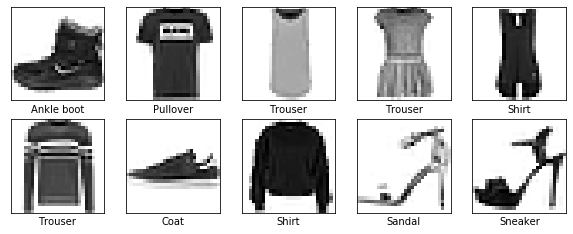

In [42]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_label[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [44]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Execute the model using model.fit()

In [45]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 209us/sample - loss: 0.7787 - accuracy: 0.7518 - val_loss: 0.6250 - val_accuracy: 0.7919
Epoch 2/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5686 - accuracy: 0.8134 - val_loss: 0.5677 - val_accuracy: 0.8082
Epoch 3/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5239 - accuracy: 0.8263 - val_loss: 0.5359 - val_accuracy: 0.8191
Epoch 4/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4995 - accuracy: 0.8335 - val_loss: 0.5170 - val_accuracy: 0.8240
Epoch 5/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4838 - accuracy: 0.8377 - val_loss: 0.5059 - val_accuracy: 0.8309
Epoch 6/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4723 - accuracy: 0.8411 - val_loss: 0.4988 - val_accuracy: 0.8285
Epoch 7/100
60000/60000 [=====================

Epoch 55/100
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3905 - accuracy: 0.8661 - val_loss: 0.4402 - val_accuracy: 0.8437
Epoch 56/100
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3902 - accuracy: 0.8655 - val_loss: 0.4458 - val_accuracy: 0.8418
Epoch 57/100
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3901 - accuracy: 0.8655 - val_loss: 0.4408 - val_accuracy: 0.8443
Epoch 58/100
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3894 - accuracy: 0.8654 - val_loss: 0.4411 - val_accuracy: 0.8432
Epoch 59/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3888 - accuracy: 0.8661 - val_loss: 0.4423 - val_accuracy: 0.8433
Epoch 60/100
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3886 - accuracy: 0.8662 - val_loss: 0.4405 - val_accuracy: 0.8451
Epoch 61/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3881

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [46]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [48]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5160 - accuracy: 0.8232 - val_loss: 0.5108 - val_accuracy: 0.8231
Epoch 2/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4844 - accuracy: 0.8342 - val_loss: 0.4934 - val_accuracy: 0.8268
Epoch 3/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4671 - accuracy: 0.8401 - val_loss: 0.4844 - val_accuracy: 0.8321
Epoch 4/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4556 - accuracy: 0.8446 - val_loss: 0.4768 - val_accuracy: 0.8331
Epoch 5/100
60000/60000 [==============================] - 4s 58us/sample - loss: 0.4478 - accuracy: 0.8471 - val_loss: 0.4712 - val_accuracy: 0.8354
Epoch 6/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4416 - accuracy: 0.8487 - val_loss: 0.4668 - val_accuracy: 0.8360
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3842 - accuracy: 0.8671 - val_loss: 0.4438 - val_accuracy: 0.8445
Epoch 56/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3833 - accuracy: 0.8674 - val_loss: 0.4453 - val_accuracy: 0.8425
Epoch 57/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3832 - accuracy: 0.8673 - val_loss: 0.4429 - val_accuracy: 0.8449
Epoch 58/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3831 - accuracy: 0.8657 - val_loss: 0.4438 - val_accuracy: 0.8453
Epoch 59/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3825 - accuracy: 0.8675 - val_loss: 0.4465 - val_accuracy: 0.8453
Epoch 60/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3819 - accuracy: 0.8668 - val_loss: 0.4438 - val_accuracy: 0.8447
Epoch 61/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3835 - ac

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [53]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Compile the model
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model3.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 56us/sample - loss: 1.2422 - accuracy: 0.5731 - val_loss: 0.8814 - val_accuracy: 0.6931
Epoch 2/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.7976 - accuracy: 0.7236 - val_loss: 0.7510 - val_accuracy: 0.7362
Epoch 3/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.7064 - accuracy: 0.7560 - val_loss: 0.6895 - val_accuracy: 0.7589
Epoch 4/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.6569 - accuracy: 0.7714 - val_loss: 0.6523 - val_accuracy: 0.7719
Epoch 5/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6256 - accuracy: 0.7827 - val_loss: 0.6266 - val_accuracy: 0.7819
Epoch 6/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.6023 - accuracy: 0.7893 - val_loss: 0.6073 - val_accuracy: 0.7889
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4448 - accuracy: 0.8474 - val_loss: 0.4763 - val_accuracy: 0.8301
Epoch 56/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4434 - accuracy: 0.8465 - val_loss: 0.4754 - val_accuracy: 0.8302
Epoch 57/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4430 - accuracy: 0.8488 - val_loss: 0.4744 - val_accuracy: 0.8309
Epoch 58/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4423 - accuracy: 0.8472 - val_loss: 0.4747 - val_accuracy: 0.8307
Epoch 59/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4417 - accuracy: 0.8484 - val_loss: 0.4738 - val_accuracy: 0.8309
Epoch 60/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4409 - accuracy: 0.8483 - val_loss: 0.4733 - val_accuracy: 0.8315
Epoch 61/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4414 - ac

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [56]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model4.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

In [57]:
#Add 1st hidden layer
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

In [58]:
sgd_optimizer2 = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model4.compile(optimizer=sgd_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model4.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 82us/sample - loss: 1.5432 - accuracy: 0.6073 - val_loss: 1.0228 - val_accuracy: 0.7248
Epoch 2/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8441 - accuracy: 0.7361 - val_loss: 0.7330 - val_accuracy: 0.7495
Epoch 3/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6735 - accuracy: 0.7655 - val_loss: 0.6346 - val_accuracy: 0.7753
Epoch 4/100
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5960 - accuracy: 0.7902 - val_loss: 0.5777 - val_accuracy: 0.7945
Epoch 5/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5467 - accuracy: 0.8077 - val_loss: 0.5403 - val_accuracy: 0.8079
Epoch 6/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5124 - accuracy: 0.8195 - val_loss: 0.5130 - val_accuracy: 0.8176
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2741 - accuracy: 0.9017 - val_loss: 0.3416 - val_accuracy: 0.8782
Epoch 56/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2717 - accuracy: 0.9035 - val_loss: 0.3408 - val_accuracy: 0.8776
Epoch 57/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2702 - accuracy: 0.9028 - val_loss: 0.3400 - val_accuracy: 0.8772
Epoch 58/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2683 - accuracy: 0.9053 - val_loss: 0.3394 - val_accuracy: 0.8778
Epoch 59/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2655 - accuracy: 0.9055 - val_loss: 0.3395 - val_accuracy: 0.8778
Epoch 60/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2641 - accuracy: 0.9057 - val_loss: 0.3387 - val_accuracy: 0.8798
Epoch 61/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2633 - 

## Review model

In [60]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model